## Objective: Building a machine learning model on that titanic dataset to predict the death of a person and check the accuracy of the model

Dataset Link: https://www.kaggle.com/c/titanic

### Data Cleaning and Preprocessing

In [71]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can see PassengerId, Name, Ticket, Parch, Embarked, Cabin are useless columns so remove these columns.

In [88]:
df_new = df.drop(['PassengerId','Name','Parch','Ticket','Cabin','Embarked'],axis='columns')
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


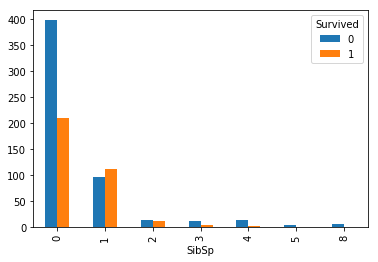

In [89]:
pd.crosstab(df_new['SibSp'],df_new['Survived']).plot(kind='bar')

In [90]:
df_new.isnull().values.any()

True

From this we see that there are some missing values in the dataset.

In [91]:
for col in df_new.columns:
    print(col,': ',df_new[col].isnull().values.any())

Survived :  False
Pclass :  False
Sex :  False
Age :  True
SibSp :  False
Fare :  False


From this we can see that only the age column have missing values

In [92]:
age_median = df_new['Age'].median()
print(age_median)

28.0


In [93]:
df_new['Age'].fillna(age_median,inplace=True)
df_new['Age'].isnull().values.any()

False

So now there aren't any missing values in our dataset.

In [94]:
X = df_new.drop('Survived',axis='columns')
X.head()

,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.0,1,7.2500
1,1,female,38.0,1,71.2833
2,3,female,26.0,0,7.9250
3,1,female,35.0,1,53.1000
4,3,male,35.0,0,8.0500


In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le_sex = LabelEncoder()
X['sex_n'] = le_sex.fit_transform(X['Sex'])
X.head()

,Pclass,Sex,Age,SibSp,Fare,sex_n
0,3,male,22.0,1,7.2500,1
1,1,female,38.0,1,71.2833,0
2,3,female,26.0,0,7.9250,0
3,1,female,35.0,1,53.1000,0
4,3,male,35.0,0,8.0500,1


Now 1 denote male and 0 denote female

In [97]:
X = X.drop('Sex',axis='columns')
X.head()

,Pclass,Age,SibSp,Fare,sex_n
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,1


In [98]:
y = df_new['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Splitting the data for training and testing the machine learning model

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Using Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Making the confusion matrix

In [101]:
predictions_lr = lr.predict(X_test)

[[93 16]
 [23 47]]


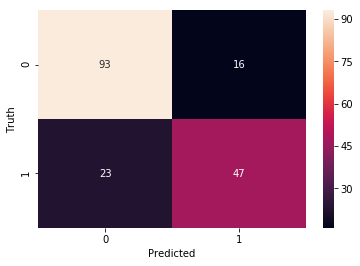

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cm_lr = confusion_matrix(y_test,predictions_lr)
sns.heatmap(cm_lr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(cm_lr)

#### Checking the accuracy of the model

In [103]:
lr.score(X_test,y_test)

0.7821229050279329

### Using K Nearest Neighbours

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [105]:
prediction_knn = knn.predict(X_test)

#### Making the confusion matrix

[[88 21]
 [36 34]]


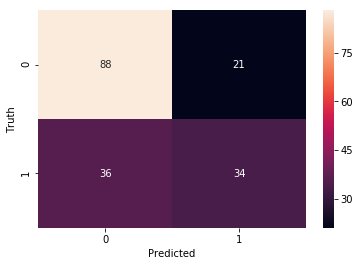

In [106]:
cm_knn = confusion_matrix(y_test,prediction_knn)
sns.heatmap(cm_knn,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(cm_knn)

#### Checking the accuracy of the model

In [107]:
knn.score(X_test,y_test)

0.6815642458100558

### Using Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [109]:
prediction_dct = dct.predict(X_test)

#### Making the confusion matrix

[[92 17]
 [20 50]]


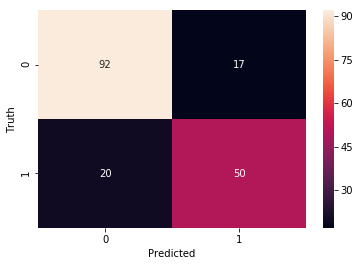

In [110]:
cm_dct = confusion_matrix(y_test,prediction_dct)
sns.heatmap(cm_dct,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(cm_dct)

#### Checking the accuracy of this model

In [111]:
dct.score(X_test,y_test)

0.7932960893854749

From all of these accuracy checking we can conclude that Logistic Regression is a better model for prediction.